## Importing Libraries

In [87]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data Preprocessing

## Training Image Preprocessing

In [88]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 70295 files belonging to 38 classes.


## Validation Image Preprocessing

In [89]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [90]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[136.75 122.75 122.75]
   [134.   120.   120.  ]
   [137.5  123.5  123.5 ]
   ...
   [143.   131.   131.  ]
   [151.5  139.5  139.5 ]
   [132.75 120.75 120.75]]

  [[134.75 120.75 120.75]
   [134.25 120.25 120.25]
   [145.25 131.25 131.25]
   ...
   [159.   147.   147.  ]
   [147.   135.   135.  ]
   [150.75 138.75 138.75]]

  [[131.25 117.25 117.25]
   [138.25 124.25 124.25]
   [130.75 116.75 116.75]
   ...
   [146.5  134.5  134.5 ]
   [150.5  138.5  138.5 ]
   [148.   136.   136.  ]]

  ...

  [[156.75 148.75 146.75]
   [181.75 173.75 171.75]
   [175.5  167.5  165.5 ]
   ...
   [118.75 107.75 111.75]
   [117.   106.   110.  ]
   [119.25 108.25 112.25]]

  [[153.75 145.75 143.75]
   [155.   147.   145.  ]
   [147.5  139.5  137.5 ]
   ...
   [ 99.75  88.75  92.75]
   [133.75 122.75 126.75]
   [123.5  112.5  116.5 ]]

  [[159.5  151.5  149.5 ]
   [163.   155.   153.  ]
   [173.75 165.75 163.75]
   ...
   [ 99.25  88.25  92.25]
   [110.5   99.5  103.5 ]
   [106.75  95.75  9

## To avoid overshooting
1. Choose small learning rate default being 0.001, we can take 0.0001
2. There may be chances of underfitting, so increase the the number of neuron.
3. Add more Convolution layer to extract more features from images may be possibility  

## Building Model

In [91]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.models import Sequential


In [92]:
model = Sequential()

In [93]:
#Building convolution layer
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [94]:
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu', input_shape=[128,128,3]))
model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [95]:
model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu', input_shape=[128,128,3]))
model.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [96]:
model.add(Conv2D(filters=256, kernel_size=3, padding='same', activation='relu', input_shape=[128,128,3]))
model.add(Conv2D(filters=256, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [97]:
model.add(Conv2D(filters=512, kernel_size=3, padding='same', activation='relu', input_shape=[128,128,3]))
model.add(Conv2D(filters=512, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [98]:
model.add(Dropout(0.25)) # to avoid overfitting

In [99]:
model.add(Flatten())

In [100]:
model.add(Dense(units=1500,activation='relu'))

In [101]:
model.add(Dropout(0.4))

In [102]:
#Output Layer
model.add(Dense(units=38, activation='softmax'))

## Compiling Model

In [ ]:
model.compile(optimizer= tf.keras.optimizers.Adam(
    learning_rate=0.0001), loss= 'categorical_crossentropy', metrics= ['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 128, 128, 32)      896       
                                                                 
 conv2d_31 (Conv2D)          (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 63, 63, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 63, 63, 64)        18496     
                                                                 
 conv2d_33 (Conv2D)          (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 30, 30, 64)       0         
 g2D)                                                 

## Model Training

In [106]:
training_history= model.fit(x = training_set, validation_data =validation_set, epochs=10)

Epoch 1/10
2197/2197 [==============================] - 1958s 891ms/step - loss: 1.3673 - accuracy: 0.5979 - val_loss: 0.5082 - val_accuracy: 0.8388
Epoch 2/10
2197/2197 [==============================] - 1886s 858ms/step - loss: 0.4363 - accuracy: 0.8596 - val_loss: 0.3667 - val_accuracy: 0.8860
Epoch 3/10
2197/2197 [==============================] - 1946s 886ms/step - loss: 0.2626 - accuracy: 0.9159 - val_loss: 0.2514 - val_accuracy: 0.9198
Epoch 4/10
2197/2197 [==============================] - 1986s 904ms/step - loss: 0.1792 - accuracy: 0.9422 - val_loss: 0.1628 - val_accuracy: 0.9461
Epoch 5/10
2197/2197 [==============================] - 19937s 9s/step - loss: 0.1359 - accuracy: 0.9558 - val_loss: 0.1848 - val_accuracy: 0.9428
Epoch 6/10
2197/2197 [==============================] - 1806s 822ms/step - loss: 0.1037 - accuracy: 0.9653 - val_loss: 0.1219 - val_accuracy: 0.9617
Epoch 7/10
2197/2197 [==============================] - 1821s 829ms/step - loss: 0.0861 - accuracy: 0.9716 -

## Model Evaluation

In [111]:
#model Evaluation on training set
train_loss, train_acc = model.evaluate(training_set)

2197/2197 [==============================] - 442s 201ms/step - loss: 0.0559 - accuracy: 0.9829


In [112]:
train_loss, train_acc

(0.05585525184869766, 0.9829291105270386)

In [113]:
#model Evaluation on validation set
val_loss, val_acc = model.evaluate(validation_set)

550/550 [==============================] - 109s 199ms/step - loss: 0.1674 - accuracy: 0.9541


In [114]:
print(val_loss, val_acc)

0.1674237996339798 0.9540746808052063


In [116]:
model.save("trained_model.keras")

In [117]:
training_history.history

{'loss': [1.3673256635665894,
  0.43633177876472473,
  0.26256054639816284,
  0.17921225726604462,
  0.13588948547840118,
  0.10370029509067535,
  0.0860968753695488,
  0.07405951619148254,
  0.06183944642543793,
  0.056116361171007156],
 'accuracy': [0.5978946089744568,
  0.8596486449241638,
  0.9159257411956787,
  0.9421722888946533,
  0.9558290243148804,
  0.9652606844902039,
  0.9716480374336243,
  0.9756312966346741,
  0.9797709584236145,
  0.982146680355072],
 'val_loss': [0.5082204937934875,
  0.3667379319667816,
  0.25135451555252075,
  0.16277100145816803,
  0.18475593626499176,
  0.12191461771726608,
  0.1441044807434082,
  0.12319464981555939,
  0.16458432376384735,
  0.16742374002933502],
 'val_accuracy': [0.8387776017189026,
  0.8859549164772034,
  0.9198155999183655,
  0.9460505247116089,
  0.9428067207336426,
  0.961700439453125,
  0.9554404616355896,
  0.9607329964637756,
  0.9552128314971924,
  0.9540746808052063]}

In [118]:
#Recording history in json.
import json
with open("train_history.json", "w") as f:
    json.dump(training_history.history,f)

## Accuracy Visualization

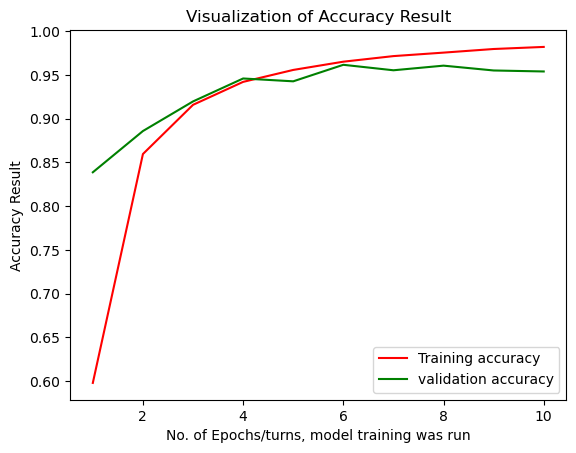

In [119]:
epochs= [i for i in range (1,11)]
plt.plot(epochs, training_history.history['accuracy'], color= 'red',label= 'Training accuracy')
plt.plot(epochs, training_history.history['val_accuracy'], color= 'green', label= 'validation accuracy')
plt.xlabel("No. of Epochs/turns, model training was run")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

## Some other metrics for model evaluation

In [120]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [37]:
test_set= tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [38]:
y_pred= model.predict(test_set)
y_pred, y_pred.shape

550/550 [==============================] - 121s 221ms/step


(array([[0.02713552, 0.02551844, 0.02968851, ..., 0.02651452, 0.03126735,
         0.02218444],
        [0.02683543, 0.0257463 , 0.02936447, ..., 0.02632296, 0.03238912,
         0.02172782],
        [0.02673881, 0.02616088, 0.03122997, ..., 0.02583077, 0.03133973,
         0.02235992],
        ...,
        [0.02782236, 0.02576169, 0.02872183, ..., 0.02591747, 0.03114465,
         0.02301334],
        [0.02797103, 0.02534499, 0.0290874 , ..., 0.02576476, 0.03063201,
         0.02366012],
        [0.02518351, 0.02404164, 0.02982502, ..., 0.02587106, 0.03390642,
         0.01987679]], dtype=float32),
 (17572, 38))

In [122]:
predicted_categories = tf.argmax(y_pred,axis=1)